In [1]:
import numpy as np
from math import cos, sqrt
from qutip import *
import matplotlib.pyplot as plt

In [2]:
n = 100
omega_c = (2*np.pi) * 1.0
delta   = (2*np.pi) * 0.5
omega_d = (2*np.pi) * 1.2
g       = (2*np.pi) * 0.25
xi      = (2*np.pi) * 1
kappa   = (2*np.pi) * 0.01
t_end, t_res = 11, 1000

omega_q = omega_c + delta

In [3]:
a = destroy(n)
sz = -1.
#N = dag(a).dot(a) + sz/2 + 0.5
N = a.dag()*a

D = (delta**2 + (4*g**2)*N).sqrtm()

H0 = omega_c*(a.dag()*a) + (omega_c-D)*sz/2
Hd = (a + a.dag())

Hd_coeff = 'xi*cos(omega_d*t)/sqrt(2)'

In [4]:
H = [H0, [Hd, Hd_coeff]]
Hd_args = {'xi' : xi, 'omega_d' : omega_d}
H_args = [Hd_args]

psi0 = fock(n, 0)

c_op = [sqrt(kappa)*a]
#c_op = []

e_op = [a.dag()*a, a]

In [5]:
t = np.linspace(0, t_end, num=t_res)
opts = Options(num_cpus=6)

In [6]:
data = mcsolve(H, psi0, t, c_op, e_op, args=Hd_args,\
              ntraj=100, progress_bar=True, options=opts)

10.0%. Run time:   1.60s. Est. time left: 00:00:00:14
20.0%. Run time:   2.57s. Est. time left: 00:00:00:10
30.0%. Run time:   3.46s. Est. time left: 00:00:00:08
40.0%. Run time:   4.92s. Est. time left: 00:00:00:07
50.0%. Run time:   5.92s. Est. time left: 00:00:00:05
60.0%. Run time:   6.81s. Est. time left: 00:00:00:04
70.0%. Run time:   8.11s. Est. time left: 00:00:00:03
80.0%. Run time:   9.26s. Est. time left: 00:00:00:02
90.0%. Run time:  10.19s. Est. time left: 00:00:00:01
100.0%. Run time:  11.25s. Est. time left: 00:00:00:00
Total run time:  11.26s


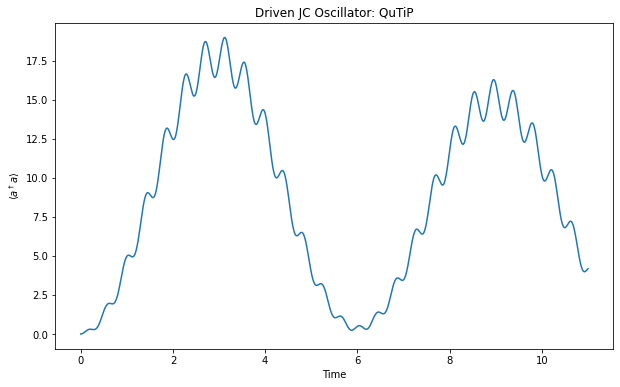

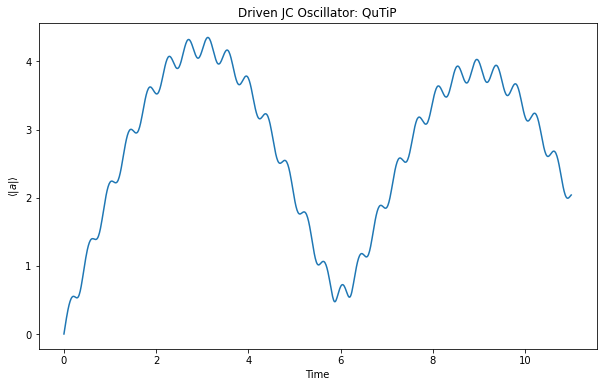

In [7]:
fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: QuTiP')
plt.xlabel('Time')
plt.ylabel(r'$\langle a^\dagger a\rangle$')
plt.plot(t, data.expect[0])
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: QuTiP')
plt.xlabel('Time')
plt.ylabel(r'$\langle \|a\| \rangle$')
plt.plot(t, abs(data.expect[1]))
plt.show()

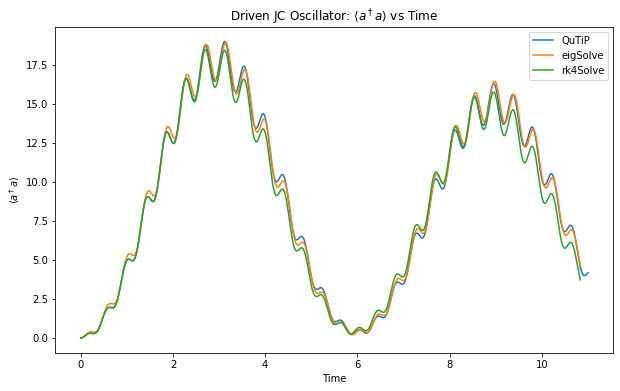

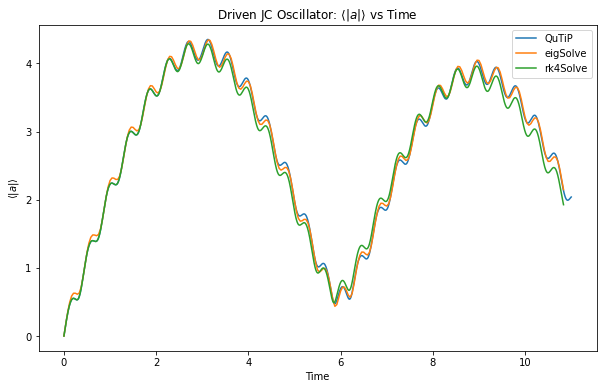

In [8]:
eigData = np.load('testEig_data.npy')
rk4Data = np.load('testRK4_data.npy')
fig = plt.figure(figsize=(10,6))
plt.title(r'Driven JC Oscillator: $\langle a^\dagger a\rangle$ vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\langle a^\dagger a\rangle$')
plt.plot(t, data.expect[0], label='QuTiP')
plt.plot(eigData[:,0], eigData[:,1], label='eigSolve')
plt.plot(rk4Data[:,0], rk4Data[:,1], label='rk4Solve')
plt.legend()
plt.savefig('num_op.png')
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title(r'Driven JC Oscillator: $\langle \|a\| \rangle$ vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\langle \|a\| \rangle$')
plt.plot(t, abs(data.expect[1]), label='QuTiP')
plt.plot(eigData[:,0], eigData[:,2], label='eigSolve')
plt.plot(rk4Data[:,0], rk4Data[:,2], label='rk4Solve')
plt.legend()
plt.savefig('a_op.png')
plt.show()